In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load dataset (Breast Cancer Dataset)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
# 2. Model Underfitting (Decision Tree dengan max_depth rendah)
model_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
model_underfit.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

In [3]:
# Prediksi
y_train_pred_underfit = model_underfit.predict(X_train)
y_test_pred_underfit = model_underfit.predict(X_test)

In [4]:
# Evaluasi performa pada data latih dan uji
train_acc_underfit = accuracy_score(y_train, y_train_pred_underfit)
test_acc_underfit = accuracy_score(y_test, y_test_pred_underfit)

print(f"Underfit Model Training Accuracy: {train_acc_underfit}")
print(f"Underfit Model Test Accuracy: {test_acc_underfit}")

Underfit Model Training Accuracy: 0.9246231155778895
Underfit Model Test Accuracy: 0.8947368421052632


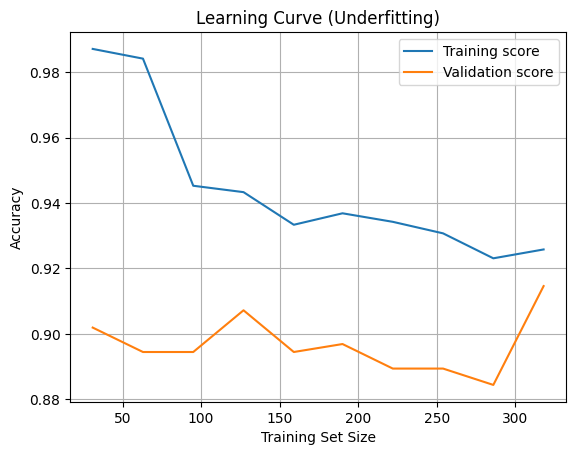

In [5]:
# Learning Curve untuk memeriksa performa pada berbagai ukuran data latih
train_sizes, train_scores, test_scores = learning_curve(model_underfit, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve (Underfitting)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Membandingkan dengan model yang lebih kompleks (e.g., max_depth=5)
model_complex = DecisionTreeClassifier(max_depth=5, random_state=42)
model_complex.fit(X_train, y_train)

y_train_pred_complex = model_complex.predict(X_train)
y_test_pred_complex = model_complex.predict(X_test)

train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)

print(f"Complex Model Training Accuracy: {train_acc_complex}")
print(f"Complex Model Test Accuracy: {test_acc_complex}")

Complex Model Training Accuracy: 0.9949748743718593
Complex Model Test Accuracy: 0.9532163742690059


#### ***mengatasi underfitting :***

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Menggunakan model yang lebih kompleks dengan max_depth lebih besar
complex_model = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model.fit(X_train, y_train)

# Prediksi pada data latih dan uji
y_train_pred_complex = complex_model.predict(X_train)
y_test_pred_complex = complex_model.predict(X_test)

# Evaluasi performa
train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)

print(f"Training Accuracy (Complex Model): {train_acc_complex}")
print(f"Test Accuracy (Complex Model): {test_acc_complex}")

Training Accuracy (Complex Model): 1.0
Test Accuracy (Complex Model): 0.9415204678362573


In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA untuk mengurangi dimensi atau menghasilkan fitur baru
pca = PCA(n_components=5)  # Menghasilkan fitur baru dari data asli
X_pca = pca.fit_transform(X_scaled)

# Membagi data menjadi data latih dan data uji
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Model dengan fitur hasil PCA
complex_model_pca = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model_pca.fit(X_train_pca, y_train_pca)

# Prediksi pada data latih dan uji
y_train_pred_pca = complex_model_pca.predict(X_train_pca)
y_test_pred_pca = complex_model_pca.predict(X_test_pca)

# Evaluasi performa
train_acc_pca = accuracy_score(y_train_pca, y_train_pred_pca)
test_acc_pca = accuracy_score(y_test_pca, y_test_pred_pca)

print(f"Training Accuracy (PCA): {train_acc_pca}")
print(f"Test Accuracy (PCA): {test_acc_pca}")

Training Accuracy (PCA): 1.0
Test Accuracy (PCA): 0.9415204678362573


In [9]:
from sklearn.model_selection import GridSearchCV

# Grid Search untuk hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                            param_grid=param_grid, cv=5, scoring='accuracy')

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Hyperparameter terbaik
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

# Evaluasi performa
train_acc_best = accuracy_score(y_train, y_train_pred_best)
test_acc_best = accuracy_score(y_test, y_test_pred_best)

print(f"Training Accuracy (Best Model): {train_acc_best}")
print(f"Test Accuracy (Best Model): {test_acc_best}")
print(f"Best Params: {best_params}")

Training Accuracy (Best Model): 0.9949748743718593
Test Accuracy (Best Model): 0.9532163742690059
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [10]:
# Melakukan normalisasi ulang dengan scaler
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X)

# Membagi ulang data latih dan uji
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_new, y, test_size=0.3, random_state=42)

# Model setelah preprocessing data lebih baik
model_after_scaling = DecisionTreeClassifier(max_depth=10, random_state=42)
model_after_scaling.fit(X_train_scaled, y_train_scaled)

# Prediksi
y_train_pred_scaled = model_after_scaling.predict(X_train_scaled)
y_test_pred_scaled = model_after_scaling.predict(X_test_scaled)

# Evaluasi performa
train_acc_scaled = accuracy_score(y_train_scaled, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test_scaled, y_test_pred_scaled)

print(f"Training Accuracy (After Scaling): {train_acc_scaled}")
print(f"Test Accuracy (After Scaling): {test_acc_scaled}")

Training Accuracy (After Scaling): 1.0
Test Accuracy (After Scaling): 0.9415204678362573


In [ ]:
# Membagi ulang data dengan lebih banyak data latih (menambah ukuran training set)
X_train_more_data, X_test_less_data, y_train_more_data, y_test_less_data = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model dengan lebih banyak data latih
model_more_data = DecisionTreeClassifier(max_depth=10, random_state=42)
model_more_data.fit(X_train_more_data, y_train_more_data)

# Prediksi
y_train_pred_more_data = model_more_data.predict(X_train_more_data)
y_test_pred_more_data = model_more_data.predict(X_test_less_data)

# Evaluasi performa
train_acc_more_data = accuracy_score(y_train_more_data, y_train_pred_more_data)
test_acc_more_data = accuracy_score(y_test_less_data, y_test_pred_more_data)

print(f"Training Accuracy (More Data): {train_acc_more_data}")
print(f"Test Accuracy (More Data): {test_acc_more_data}")

Training Accuracy (More Data): 1.0
Test Accuracy (More Data): 0.9473684210526315
